## Milestone 02 - Capstone Project Definition
### Author: Ana Javed

#### Workplace Scenario



The capstone project focuses on diaper manufacturing quality. In the Lesson 01 assignment, you discovered how the diaper manufacturing process works. Generally, to ensure or predict quality, a diaper manufacturer need s to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.

For this capstone project, we will use the SECOM (https://archive.ics.uci.edu/ml/machine-learning-databases/secom/) manufacturing Data Set from the UCI Machine Learning Repository. The set is originally for semiconductor manufacturing, but in our case, we will assume that it is for the diaper manufacturing process.

The dataset consists of two files:

   - a dataset file SECOM containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix
   - a labels file listing the classifications and date time stamp for each example

Reference

Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.



### Instructions

Create a new notebook for this assignment named Milestone02_studentname.ipynb (replacing studentname with your own).

    Split prepared data from Milestone 1 into training and testing
    Build a decision tree model that detects faulty products
    Build an ensemble model that detects faulty products
    Build an SVM model
    Evaluate all three models
    Solicit specific feedback on your code (instructions below).

Instructions to Solicit Feedback

Write 2-3 questions soliciting feedback on specific aspects on the assignment. For example, if you did something one way but are unsure if there might be a different or better way to do it, ask for feedback on that part. You may submit these questions by commenting out in the code within your .ipynb file or by typing them below your file name in the Your Response box on the Submit Milestone Assignment page. While the questions you submit will have no bearing on your grade, by doing so, you will engage more actively with the assignment and we will also be able to give you pointed feedback.


Reading and Merging Data

In [128]:
## Importing Necessary Libraries & Packages 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
import csv
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Declaring inline visualizations 
%matplotlib inline


In [129]:
## Reading data file into Dataframe 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
labels_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

col_name_list = []
## Renaming Columns to different Sensor #'s
for i in range (1, 591, 1):
    col_name_list.append("sensor" + str(i))

# print (col_name_list)
    
df = pd.read_csv(url, sep=" ", header=None , names = col_name_list)
df_labels = pd.read_csv(labels_url, sep=" ", header = None, names = ["class", "timestamp"])


## First 5 Rows from Dataframes
print(df.head())
print(df_labels.head()) 


   sensor1  sensor2    sensor3    sensor4  sensor5  sensor6   sensor7  \
0  3030.93  2564.00  2187.7333  1411.1265   1.3602    100.0   97.6133   
1  3095.78  2465.14  2230.4222  1463.6606   0.8294    100.0  102.3433   
2  2932.61  2559.94  2186.4111  1698.0172   1.5102    100.0   95.4878   
3  2988.72  2479.90  2199.0333   909.7926   1.3204    100.0  104.2367   
4  3032.24  2502.87  2233.3667  1326.5200   1.5334    100.0  100.3967   

   sensor8  sensor9  sensor10  ...  sensor581  sensor582  sensor583  \
0   0.1242   1.5005    0.0162  ...        NaN        NaN     0.5005   
1   0.1247   1.4966   -0.0005  ...     0.0060   208.2045     0.5019   
2   0.1241   1.4436    0.0041  ...     0.0148    82.8602     0.4958   
3   0.1217   1.4882   -0.0124  ...     0.0044    73.8432     0.4990   
4   0.1235   1.5031   -0.0031  ...        NaN        NaN     0.4800   

   sensor584  sensor585  sensor586  sensor587  sensor588  sensor589  sensor590  
0     0.0118     0.0035     2.3630        NaN        

In [130]:
## Conducting Exploratory Data Analysis: 

print(df.shape)  # (1567, 592)
print(df.dtypes) 
print(df.describe()) 

print(df_labels.shape)  # (1567, 2)

df.head()

(1567, 590)
sensor1      float64
sensor2      float64
sensor3      float64
sensor4      float64
sensor5      float64
              ...   
sensor586    float64
sensor587    float64
sensor588    float64
sensor589    float64
sensor590    float64
Length: 590, dtype: object
           sensor1      sensor2      sensor3      sensor4      sensor5  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

       sensor6      sensor7      sensor8      sensor9     senso

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,...,sensor581,sensor582,sensor583,sensor584,sensor585,sensor586,sensor587,sensor588,sensor589,sensor590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


Clean and prepare data

In [131]:
## Function to Find & Replace Missing values

def replace_missing_values(df):
    for each in df.columns:
        if df.loc[:, each].dtype in ('float64', 'int64'):
            df.loc[:, each] = pd.to_numeric(df.loc[:, each], errors='coerce')
            HasNan1 = np.isnan(df.loc[:, each] )
            # print("Number of missing values removed in " + each + " column:", sum(HasNan1)) 
            df.loc[HasNan1, each] = np.nanmedian(df.loc[:, each] )




In [132]:
## Missing Value Counts by Columns: 
replace_missing_values(df)


## Standardizing / Normalizing Values with StandardScaler 
standardization_scale = StandardScaler().fit(df)
df = pd.DataFrame(standardization_scale.transform(df), 
                             columns=df.columns)

## Merging the two Datasets into df 
df['class'] = df_labels['class']
df['timestamp'] = df_labels['timestamp']


In [133]:
## Adding separate date and time columns 
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date_column'] = pd.to_datetime(df['timestamp']).dt.date
df['time_column'] = pd.to_datetime(df['timestamp']).dt.time

## Creating counts Column for visualizations 
df['counts'] = 1

## Adding Month Column and TimeOfDay Column
df['Month'] = pd.to_datetime(df['timestamp']).dt.month

### Categorizing Time of Day into 
### Morning", "Early Afternoon", "Later Afternoon", "Evening" Buckets
df.loc[:, "TimeOfDay"] = df.loc[:, "time_column"]
df.loc[df.loc[:, "time_column"] < pd.to_datetime('19:00:00').time() , "TimeOfDay"] = "Late Afternoon"
df.loc[df.loc[:, "time_column"] < pd.to_datetime('13:00:00').time()  , "TimeOfDay"] = "Early Afternoon"
df.loc[df.loc[:, "time_column"] < pd.to_datetime('07:00:00').time() , "TimeOfDay"] = "Morning"
df.loc[df.loc[:, "time_column"] >= pd.to_datetime('19:00:00').time() , "TimeOfDay"] = "Evening"


In [134]:
## Validating New Column Counts
# print("Category Counts: ")
# print(df.loc[:, "TimeOfDay"].value_counts())

# Verifying the Ranges for the Categories 
print("\nMorning: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Morning" , "time_column"]), " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Morning" , "time_column"]),
     )
print("\nEarly Afternoon: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Early Afternoon" , "time_column"]),  " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Early Afternoon" , "time_column"]),
     )
print("\nLate Afternoon: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Late Afternoon" , "time_column"]),  " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Late Afternoon" , "time_column"]),
     )
print("\nEvening: ")
print(min(df.loc[df.loc[:, "TimeOfDay"] =="Evening" , "time_column"]),  " to ",
      max(df.loc[df.loc[:, "TimeOfDay"] =="Evening" , "time_column"]),
     )


Morning: 
00:01:00  to  06:56:00

Early Afternoon: 
07:01:00  to  12:58:00

Late Afternoon: 
13:01:00  to  18:59:00

Evening: 
19:03:00  to  23:59:00


Visually explore data

Number of Values in Each Class: 
-1    1463
 1     104
Name: class, dtype: int64


(array([1463.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         104.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

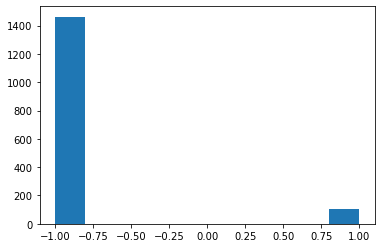

In [135]:
## Distribution of The Class Categories 
print("Number of Values in Each Class: ")
print(df.loc[:, "class"].value_counts())

plt.hist(df.loc[:, "class"])

2008-02-09    62
2008-08-29    50
2008-08-30    49
2008-06-10    48
2008-08-21    44
              ..
2008-08-13     1
2008-07-25     1
2008-02-08     1
2008-07-20     1
2008-08-25     1
Name: date_column, Length: 86, dtype: int64


Min Date:  2008-01-08 02:02:00
Max Date:  2008-12-10 18:47:00


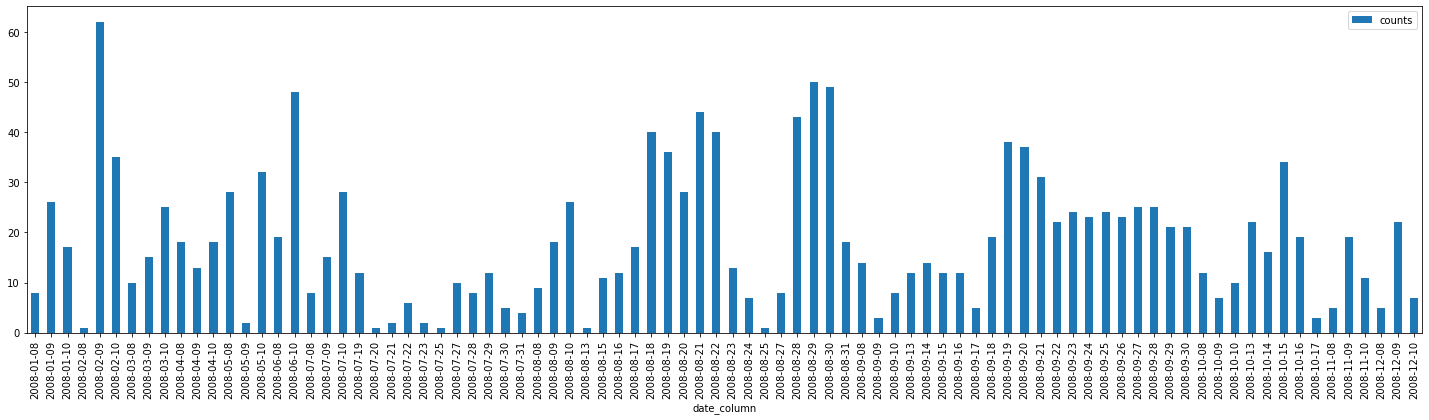

In [136]:
### Data Value Counts By Day 
## Bar Plot
fig = plt.figure(figsize=(25, 6)) # Define plot area
ax = fig.gca() # Define axis
df.loc[:, ['date_column', 'counts']].groupby(['date_column']).agg('count').sort_values('date_column').plot.bar(ax=ax)


# Printing Unique Counts of Each Day 
print(df.loc[:, "date_column"].value_counts().sort_values(axis = 0, ascending = False))
print('\n')
## Printing Min and Max Timestamp Values
print("Min Date: ", min(df.loc[:,'timestamp']))
print("Max Date: ", max(df.loc[:,'timestamp']))

Morning            438
Late Afternoon     405
Early Afternoon    380
Evening            344
Name: TimeOfDay, dtype: int64




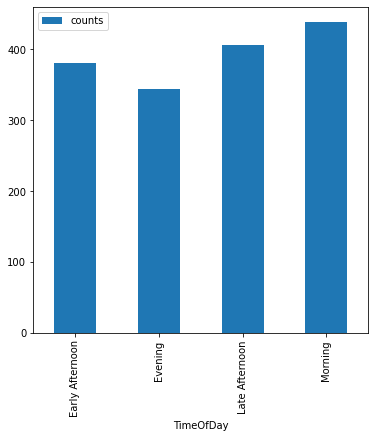

In [137]:
### Counts By Time of Day 
## Bar Plot
fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis
df.loc[:, ['TimeOfDay', 'counts']].groupby(['TimeOfDay']).agg('count').sort_values('TimeOfDay').plot.bar(ax=ax)

# Printing Unique Counts of Each Day 
print(df.loc[:, "TimeOfDay"].value_counts().sort_values(axis = 0, ascending = False))
print('\n')


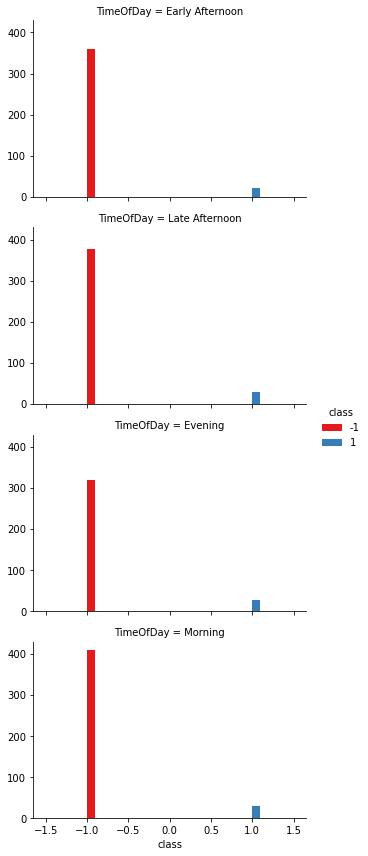

In [138]:
## Facet Plot: By Class 
import seaborn as sns
g = sns.FacetGrid(df,  
                  row='TimeOfDay', 
                  hue="class",
                  aspect = 1.5,
                  palette = "Set1"
                 )
g = g.map(plt.hist, "class").add_legend().tight_layout()
g

Handle class imbalance problem

In [139]:
df = df.drop(columns="timestamp")
df = df.drop(columns="date_column")
df = df.drop(columns="time_column")
df = df.drop(columns="TimeOfDay")
df = df.drop(columns="class")
df = df.drop(columns="counts")

print(df.shape)  #(1567, 593)

## Splitting Training and Testing Data
x_train, x_test, y_train, y_test = train_test_split (np.array(df),
                                                     np.array(df_labels.loc[:,"class"]),
                                                     test_size = 0.5,
                                                     random_state = 123)

(1567, 591)


In [140]:
## Loading SMOTE Package 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state= 1234)

X_res, y_res = sm.fit_resample(x_train, y_train)


In [141]:
## Checking the Total Resampled Counts
uni, freq = np.unique(y_res, return_counts = True)  # 50% Class 0, #50% Class 1

print(len(y_res), uni, freq )  # New Counts per Class
print(X_res.shape)

    

1466 [-1  1] [733 733]
(1466, 591)


Apply feature selection techniques to reduce dimensionality of data

I will be applying the Lasso embed method to reduce the number of features in this dataset.

In [142]:
## Separating out the target variable
X = df
y = df_labels.loc[:, "class"]

## Applying LASSO Embedded Method 
from sklearn import linear_model

alpha = 0.025 # Increasing alpha can shrink variable coefficients more to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)


[-0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
 -0.          0.         -0.0061404  -0.          0.          0.
 -0.          0.          0.          0.02631023 -0.          0.
 -0.          0.         -0.          0.         -0.         -0.
  0.         -0.          0.          0.00724393 -0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.          0.          0.0455032
 -0.          0.         -0.          0.          0.02040781  0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.          0.00511417 -0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.          0.         -0.          0.          0.
 -0.          0.  

In [143]:
for i, val in enumerate(clf.coef_):
    # print(i, val)
    if str(abs(val)) != '0.0':
        if df.columns[i] != 'class':
            print (df.columns[i], ".... Column:", i, "....", val)

sensor15 .... Column: 14 .... -0.006140397488435855
sensor22 .... Column: 21 .... 0.026310228829674553
sensor34 .... Column: 33 .... 0.007243928685268307
sensor60 .... Column: 59 .... 0.04550319677074833
sensor65 .... Column: 64 .... 0.020407806037949273
sensor76 .... Column: 75 .... 0.005114173133561314
sensor104 .... Column: 103 .... 0.01962183029918629
sensor115 .... Column: 114 .... 0.00865591331258631
sensor122 .... Column: 121 .... 0.014536747850965488
sensor130 .... Column: 129 .... 0.010400698849259718
sensor131 .... Column: 130 .... 0.002875723555295411
sensor282 .... Column: 281 .... -0.002810470537685449
sensor317 .... Column: 316 .... -0.001413139161257039
sensor349 .... Column: 348 .... 0.026488427956661325
sensor432 .... Column: 431 .... 0.004292709581914159
sensor438 .... Column: 437 .... 0.010047530783654396
sensor456 .... Column: 455 .... 0.002102233413598377
sensor485 .... Column: 484 .... -0.00025826101620221933
sensor511 .... Column: 510 .... 0.01037155426838045


Initial findings:

This dataset shows serious class imbalance. Approximately 7% of the rows were of class "1" and the rest were "-1", which is why SMOTE was utilize to handle the imbalance. During data exploration, it was found that there were about even amounts of values for each of the "TimeOfDay" categories (Morning, Early Afternoon, Late Afternoon, and Evening). 

Lastly, the feature selection method applied to the dataset was the Embedded Method, specifically the LASSO method. A higher alpha value means a higher penalty for coefficients, and the more the coefficients will be closer to 0. With this information, I set the alpha = 0.025, and 19 of the original 591 attributes returned. They were:

    - sensor15 .... Column: 14 .... -0.006140397488435855
    - sensor22 .... Column: 21 .... 0.026310228829674553
    - sensor34 .... Column: 33 .... 0.007243928685268307
    - sensor60 .... Column: 59 .... 0.04550319677074833
    - sensor65 .... Column: 64 .... 0.020407806037949273
    - sensor76 .... Column: 75 .... 0.005114173133561314
    - sensor104 .... Column: 103 .... 0.01962183029918629
    - sensor115 .... Column: 114 .... 0.00865591331258631
    - sensor122 .... Column: 121 .... 0.014536747850965488
    - sensor130 .... Column: 129 .... 0.010400698849259718
    - sensor131 .... Column: 130 .... 0.002875723555295411
    - sensor282 .... Column: 281 .... -0.002810470537685449
    - sensor317 .... Column: 316 .... -0.001413139161257039
    - sensor349 .... Column: 348 .... 0.026488427956661325
    - sensor432 .... Column: 431 .... 0.004292709581914159
    - sensor438 .... Column: 437 .... 0.010047530783654396
    - sensor456 .... Column: 455 .... 0.002102233413598377
    - sensor485 .... Column: 484 .... -0.00025826101620221933
    - sensor511 .... Column: 510 .... 0.01037155426838045


It is difficult to make inferences about the sensor types, since there is little information of the different sensors - but it is going to be computationally easier for our models to work with 19 attributes now. 

### 1. Split prepared data from Milestone 1 into training and testing

In [144]:
df_reduced = df.loc[:, ['sensor15','sensor22','sensor34','sensor60',
           'sensor65','sensor76','sensor104','sensor115',
           'sensor122','sensor130','sensor131','sensor282',
           'sensor317','sensor349', 'sensor432','sensor438',
           'sensor456','sensor485','sensor511',]]

In [145]:
X = np.array(df_reduced)
y = np.array(df_labels.loc[:,"class"])

## Loading SMOTE Package 
sm = SMOTE(random_state= 1)
X, y = sm.fit_resample(X, y)

## Breakdown of the Counts 
print(np.unique(y, return_counts=True))



(array([-1,  1]), array([1463, 1463]))


In [146]:
## Splitting Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.5,
                                                     random_state = 123)

### 2. Build a decision tree model that detects faulty products

In [147]:
from sklearn.tree import DecisionTreeClassifier 
# Decision Tree Model - Using Gini Criterion (default, with no hyperparameters)

# Using X_res, y_res variables, which account for class imbalance 
model_gini = DecisionTreeClassifier(random_state = 1).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

In [148]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Gini accuracy is : {}%".format(accuracy_score(
    y_test, y_gini_pred)*100))
print("Gini precision is : {}%".format(precision_score(
    y_test, y_gini_pred)*100))
print("Gini recall is : {}%".format(recall_score(
    y_test, y_gini_pred)*100))

Gini accuracy is : 86.1244019138756%
Gini precision is : 83.87516254876462%
Gini recall is : 89.08839779005525%


In [149]:
## Printing the Confusion Matrix for the Decision Tree Model 
from sklearn.metrics import confusion_matrix

print("\n")
print("Gini Model Confusion Matrix: ")
print(pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted Normal', 'Predicted Defect'],
    index=['True Normal', 'True Defect']
))



Gini Model Confusion Matrix: 
             Predicted Normal  Predicted Defect
True Normal               615               124
True Defect                79               645


### 3. Build an ensemble model that detects faulty products


In [154]:
## Ensemble Model Approach:
from sklearn.ensemble import RandomForestClassifier

## Defining Model Parameters: 
nTrees = 100
max_depth = 7
min_node_size = 5
verbose = 0


## Generating Random Forest Classifier 
clf = RandomForestClassifier(n_estimators=nTrees, 
                             max_depth=max_depth,
                             random_state=0, 
                             verbose=verbose, 
                             min_samples_leaf=min_node_size)
clf.fit(X_train, y_train)
y_predict2 = clf.predict(X_test)


In [155]:
## Validating the model
print("Ensemble Accuracy is : {}%".format(accuracy_score(
    y_test, y_predict2)*100))
print("Ensemble Precision is : {}%".format(precision_score(
    y_test, y_predict2)*100))
print("Ensemble Recall is : {}%".format(recall_score(
    y_test, y_predict2)*100))


Ensemble Accuracy is : 89.33697881066303%
Ensemble Precision is : 85.678391959799%
Ensemble Recall is : 94.1988950276243%


In [156]:
print("Ensemble Confusion Matrix: ")
print(pd.DataFrame(
    confusion_matrix(y_test, y_predict2),
    columns=['Predicted Normal', 'Predicted Defect'],
    index=['True Normal', 'True Defect']
))

Ensemble Confusion Matrix: 
             Predicted Normal  Predicted Defect
True Normal               625               114
True Defect                42               682


### 4. Build an SVM model

In [157]:
cost = .9 # penalty parameter 
gamma = 8 # defines the influence of input vectors on the margins

from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Test rbf 
clf = svm.SVC(gamma=gamma, kernel='poly', C=cost, random_state=1).fit(X_train, y_train)
y_predict3 = clf.predict(X_test)
print("Polynomial Kernel")
print(classification_report(y_predict3, y_test))

Polynomial Kernel
              precision    recall  f1-score   support

          -1       0.77      0.97      0.86       585
           1       0.98      0.81      0.88       878

    accuracy                           0.87      1463
   macro avg       0.87      0.89      0.87      1463
weighted avg       0.89      0.87      0.87      1463



In [158]:
## Validating the model
print("SVM Accuracy is : {}%".format(accuracy_score(
    y_test, y_predict3)*100))
print("SVM Precision is : {}%".format(precision_score(
    y_test, y_predict3)*100))
print("SVM Recall is : {}%".format(recall_score(
    y_test, y_predict3)*100))


SVM Accuracy is : 87.2863978127136%
SVM Precision is : 80.6378132118451%
SVM Recall is : 97.79005524861878%


### 5. Evaluate all three models

The Single Decision Tree results were:
- Gini accuracy is : 86.1244019138756%
- Gini precision is : 83.87516254876462%
- Gini recall is : 89.08839779005525%

The Ensemble Method results were:
- Ensemble Accuracy is : 89.33697881066303%
- Ensemble Precision is : 85.678391959799%
- Ensemble Recall is : 94.1988950276243%

The SVM Method results were:
- SVM Accuracy is : 87.2863978127136%
- SVM Precision is : 80.6378132118451%
- SVM Recall is : 97.79005524861878%

In comparison to each other, the method with the highest accuracy was the Ensemble (Random Forest) method. It had an accuracy rate of 89.29%, the SVM method was the next highest at 87.28%, and the Decision Tree had 86.12%. The model that had the highest precision was once again the Ensemble method, which was 85.68%. The Decision Tree had the second highest precision at 83.87% and the SVM method had a precision of 80.64%. Lastly, the model with the highest recall percentage was the SVM method, which was 87.79%. The Ensemble method had the next highest recall at 94.19%, and the Decision Tree had a recall at 89.08%.

Overall each model performed well, while still having room to grow. The best model to use for detecting defected products is the Ensemble method since it had the highest accurace and precision out of all three methods. In order to optimize this model, I would fine tune the parameters to see if the model could its metrics, but also I would revisit the feature selection conducted (Lasso technique was initially used) in the data preparation stage, to see if there were other features that could improve the models. 

### 6. Solicit specific feedback on your code (instructions below).

1. For handling class imbalance, should you resample (via SMOTE) both the training datasets and testing datasets? Or just the training dataset?

2. What's a good percentage for the amount of test data? I usually have been doing 50% test data and 50% train data, but I noticed this can impact a models performance.

3. Is it ok that the model I found to perform the best had the highest Accuracy and Precision score out of all the other models? This  